# SVM и его ядра
__Суммарное количество баллов: 10__

In [6]:
import time
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, ensemble
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [2]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier."""
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


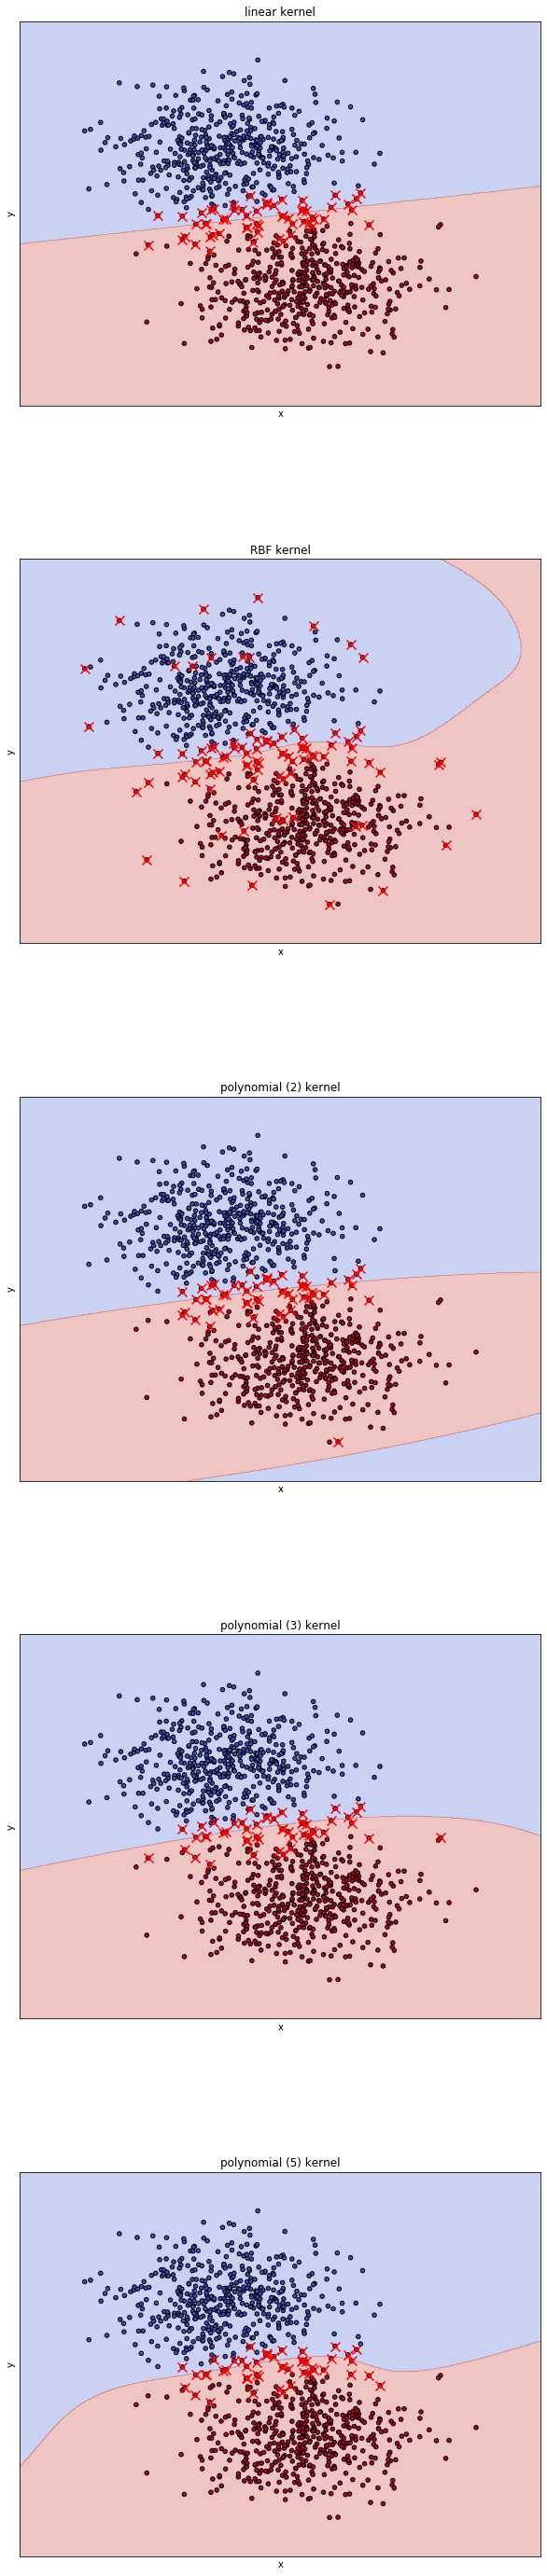

In [3]:
df = pd.read_csv('hw1/blobs2.csv')
y = df['label'].values
X = df[['x', 'y']].values

C = 1.
models = (
    svm.SVC(kernel='linear', C=C),
    svm.SVC(kernel='rbf', gamma=0.7, C=C),
    svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
    svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
    svm.SVC(kernel='poly', degree=5, gamma='auto', C=C)
)

models = (clf.fit(X, y) for clf in models)

titles = (
    'linear kernel',
    'RBF kernel',
    'polynomial (2) kernel',
    'polynomial (3) kernel',
    'polynomial (5) kernel'
)

fig, sub = plt.subplots(5, 1, figsize=(10,50))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='x', s=100, color='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [9]:
def bench(clf, X_train, X_test, y_train, y_test):
    start_time = time.monotonic()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred), time.monotonic() - start_time

### Spam

In [62]:
df = pd.read_csv('hw1/spam.csv')
y = df['label'].values
X = df.drop('label', axis=1).values
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm_clf = svm.SVC(kernel='rbf', gamma='auto', C=1)
svm_accuracy, svm_time = bench(svm_clf, X_train, X_test, y_train, y_test)

rf_clf = ensemble.RandomForestClassifier()
rf_accuracy, rf_time = bench(rf_clf, X_train, X_test, y_train, y_test)
speed_up = svm_time / rf_time

print('Spam dataset, data size: ', X.shape)
print('Accuracy for SVM: ', svm_accuracy, f'. Execution time {svm_time:.3f}s.')
print('Accuracy for Random Forest: ', rf_accuracy, f'. Execution time {rf_time:.3f}s.')
print(f'Random Forest is {speed_up if speed_up >= 1 else 1. / speed_up:.2f} {"faster" if speed_up >= 1 else  "slower"}.')

Spam dataset, data size:  (4601, 57)
Accuracy for SVM:  0.9305103148751357 . Execution time 0.381s.
Accuracy for Random Forest:  0.9370249728555917 . Execution time 0.049s.
Random Forest is 7.71 faster.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Cancer

In [64]:
df = pd.read_csv('hw1/cancer.csv')
y = (df['label'] == 'M').values
X = df.drop('label', axis=1).values
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm_clf = svm.SVC(kernel='rbf', gamma='auto', C=1)
svm_accuracy, svm_time = bench(svm_clf, X_train, X_test, y_train, y_test)

rf_clf = ensemble.RandomForestClassifier()
rf_accuracy, rf_time = bench(rf_clf, X_train, X_test, y_train, y_test)
speed_up = svm_time / rf_time

print('Cancer dataset, data size: ', X.shape)
print('Accuracy for SVM: ', svm_accuracy, f'. Execution time {svm_time:.3f}s.')
print('Accuracy for Random Forest: ', rf_accuracy, f'. Execution time {rf_time:.3f}s.')
print(f'Random Forest is {speed_up if speed_up >= 1 else 1. / speed_up:.2f} {"faster" if speed_up >= 1 else  "slower"}.')

Cancer dataset, data size:  (569, 30)
Accuracy for SVM:  0.9736842105263158 . Execution time 0.006s.
Accuracy for Random Forest:  0.956140350877193 . Execution time 0.017s.
Random Forest is 2.61 slower.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
